<a href="https://colab.research.google.com/github/khalishekahmad/teachingMLDL/blob/deep-learning/Deep_Learning_Week_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Penyelesaian Tugas Deep Learning menggunakan PyTorch and TensorFlow (Week 1, Dataset Infrared)

# Persiapan: Pemuatan dan Preprocessing Data

## 1. Menginstal atau Memastikan Instalasi PyTorch, Tensorflow dan Modul Pendukung Seperti NumPy dan Pandas

In [15]:
%pip install pandas numpy matplotlib scikit-learn torch tensorflow

Note: you may need to restart the kernel to use updated packages.


## 2. Mengimpor Library yang Dibutuhkan

In [16]:
import pandas as pd # untuk membaca data dari file csv
import numpy as np # untuk operasi matematika
from sklearn.model_selection import train_test_split # untuk membagi data menjadi data latih dan data uji
from sklearn.preprocessing import LabelEncoder # untuk mengubah label kelas menjadi angka
import matplotlib.pyplot as plt # untuk membuat plot

## 3. Memuat Dataset ke Dalam Program

In [17]:
data = pd.read_csv('./Infrared.csv').dropna() # membaca data dari file csv
data.sample(10) # menampilkan 10 baris data secara acak

,Gender,Age,Ethnicity,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,...,T_FHRC1,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1,aveOralM
950,Male,18-20,White,24.9,26.4,0.70,1.2125,35.747500,35.832500,35.232500,...,35.010000,35.0375,34.935000,34.362500,35.925000,35.415000,36.2275,36.132500,36.162500,36.89
420,Female,18-20,White,25.7,27.8,0.60,1.4700,35.680000,35.945000,35.177500,...,34.787500,34.7225,34.557500,34.702500,35.435000,35.232500,36.0100,35.547500,35.595000,36.89
57,Male,21-25,White,23.2,37.3,0.60,0.7500,36.062500,35.950000,35.085000,...,34.640000,34.7875,34.442500,34.442500,35.407500,35.017500,36.1400,35.680000,35.727500,37.04
860,Female,21-25,White,24.2,18.3,0.62,1.0050,35.605000,35.715000,34.850000,...,34.922500,35.1375,34.487500,34.870000,35.552500,35.272500,36.0650,35.897500,35.937500,36.99
868,Female,18-20,White,24.0,27.2,0.60,0.6600,35.783333,35.503333,35.023333,...,33.336667,33.7200,32.923333,33.746667,34.623333,34.016667,36.2300,35.756667,35.793333,36.49
180,Male,21-25,Black or African-American,23.0,12.6,0.69,1.1925,34.790000,35.277500,34.470000,...,34.407500,34.4500,34.415000,34.352500,35.182500,34.862500,35.5775,35.282500,35.307500,36.34
939,Female,18-20,Multiracial,24.1,20.1,0.66,1.0000,35.470000,35.285000,35.195000,...,34.637500,34.6950,34.505000,34.292500,34.980000,34.862500,35.7850,35.712500,35.735000,36.84
572,Male,18-20,White,24.3,43.2,0.63,1.2750,35.590000,35.535000,35.382500,...,34.550000,35.0025,34.815000,33.772500,35.512500,35.415000,35.9275,35.857500,35.882500,36.84
192,Female,21-25,White,23.8,15.1,0.62,0.8525,35.340000,35.365000,34.437500,...,33.670000,34.2825,33.710000,34.265000,34.937500,34.810000,35.9650,35.802500,35.837500,36.94
391,Female,21-25,White,21.0,55.9,0.64,0.5050,35.592500,35.300000,34.935000,...,34.327500,34.1250,34.072500,34.142500,34.625000,34.590000,35.7950,35.652500,35.700000,36.99


In [18]:
data.describe() # menampilkan statistik data

,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,aveAllL13_1,T_RC1,T_RC_Dry1,...,T_FHRC1,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1,aveOralM
count,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,...,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000
mean,24.115815,28.749411,0.729784,0.968991,35.596374,35.611651,34.888828,35.012899,35.659874,35.587022,...,34.568583,34.565945,34.488836,34.578310,35.422130,35.094648,36.084615,35.805225,35.837984,37.028163
std,1.337617,13.070900,2.456486,0.362860,0.575436,0.550265,0.719114,0.633228,0.554440,0.569827,...,0.669346,0.678941,0.667293,0.728353,0.523703,0.576283,0.492236,0.559755,0.559812,0.509743
min,20.200000,9.900000,0.540000,-0.590000,33.897500,34.122500,31.770000,32.902500,33.985000,33.825000,...,31.452500,31.657500,31.280000,31.150000,33.407500,32.440000,34.892500,33.802500,33.835000,35.540000
25%,23.400000,17.600000,0.600000,0.772500,35.247500,35.270625,34.457500,34.655625,35.332500,35.248125,...,34.181250,34.178125,34.097500,34.226875,35.118750,34.758125,35.775000,35.473125,35.500000,36.752500
50%,24.000000,26.300000,0.620000,0.940000,35.547500,35.575000,34.915000,34.997500,35.602500,35.531250,...,34.597500,34.602500,34.512917,34.622500,35.392500,35.100000,36.027500,35.788750,35.825000,36.940000
75%,24.700000,36.200000,0.700000,1.140000,35.872500,35.884375,35.300000,35.364375,35.911875,35.856875,...,34.969375,34.965000,34.879375,35.012500,35.675000,35.415000,36.280000,36.087500,36.121875,37.140000
max,29.100000,61.200000,79.000000,2.875000,38.405000,38.042500,37.575000,37.680000,38.385000,38.380000,...,37.075000,37.165000,37.212500,37.367500,38.002500,37.632500,38.807500,38.417500,38.455000,40.340000


## 4. Mengonversi dan Menormalisasi Data

In [19]:
# Mengubah data kategorikal menjadi angka
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender']) # Mengubah label 'Gender' menjadi angka
data['Age'] = label_encoder.fit_transform(data['Age']) # Mengubah label 'Age' menjadi angka
data['Ethnicity'] = label_encoder.fit_transform(data['Ethnicity']) # Mengubah label 'Ethnicity' menjadi angka

# Memisahkan kolom yang digunakan sebagai fitur dan label
X = data.drop("aveOralM", axis=1).values
y = data["aveOralM"].values.reshape(-1, 1)

print(X, y) # menampilkan data fitur dan label

# Memisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

[[ 1.      5.      5.     ... 35.6925 35.635  35.6525]
 [ 0.      4.      2.     ... 35.175  35.0925 35.1075]
 [ 0.      2.      5.     ... 35.9125 35.86   35.885 ]
 ...
 [ 0.      0.      2.     ... 36.535  35.965  35.9975]
 [ 1.      3.      3.     ... 35.86   35.415  35.435 ]
 [ 0.      0.      5.     ... 35.9725 35.89   35.9175]] [[36.59]
 [37.19]
 [37.34]
 ...
 [37.59]
 [37.29]
 [37.19]]


## 5. Mempersiapkan Rumus Evaluasi (MSE, RMSE, RSquared)

In [20]:
# Fungsinya untuk menghitung metrik evaluasi
# Metrik evaluasi yang digunakan adalah Mean Squared Error (MSE), Root Mean Squared Error (RMSE), dan R^2
def calculate_metrics(y_true, y_pred):
    mse = np.mean((y_true - y_pred) ** 2) # Mean Squared Error
    rmse = np.sqrt(mse) # Root Mean Squared Error
    ss_res = np.sum((y_true - y_pred) ** 2) # Sum of Squared Residuals (SSR)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2) # Total Sum of Squares (SST)
    r2 = 1 - ss_res / ss_tot # R^2, yaitu 1 - (SSR/SST)\
    
    return mse, rmse, r2

## 6. Membuat Fungsi Visualisasi

In [21]:
# Fungsinya untuk menampilkan plot hasil prediksi
def visualize_results(y_true, y_pred):
    plt.scatter(y_true, y_pred)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Actual vs. Predicted')
    plt.show()

# Fungsinya untuk menampilkan plot hasil training model PyTorch
def visualize_training(history):
    plt.plot(history['loss'])
    plt.yscale('log')
    plt.title('Model loss')
    plt.ylabel('Loss (log scale)')
    plt.xlabel('Epoch')
    plt.legend(['Loss'], loc='upper left')
    plt.show()

# A. Deep Learning dengan PyTorch

## 1. Mengimpor Library yang Dibutuhkan

In [43]:
import torch
import torch.nn as nn # untuk membuat model neural network dengan pytorch
import torch.optim as optim # untuk mengoptimalkan model neural network

## 2. Mengonversi Dataset Menjadi Tipe Tensor PyTorch

In [44]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32) # Mengubah data latih menjadi tensor
y_train_tensor = torch.tensor(y_train, dtype=torch.float32) # Mengubah label data latih menjadi tensor
X_test_tensor = torch.tensor(X_test, dtype=torch.float32) # Mengubah data uji menjadi tensor
y_test_tensor = torch.tensor(y_test, dtype=torch.float32) # Mengubah label data uji menjadi tensor

## 3. Menyusun Model Neural Network Sederhana


In [46]:
# Mendefinisikan model sederhana (Multi-Layer Perceptron)
class SimpleNN(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(SimpleNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, output_dim)
        )
    
    def forward(self, x):
        return self.model(x)
    
input_dim = X_train.shape[1] # Jumlah fitur
hidden_dim = 128 # Jumlah neuron pada hidden layer
output_dim = 1 # Jumlah neuron pada output layer

model = SimpleNN(input_dim, hidden_dim, output_dim) # Membuat model

## 4. Menyiapkan Optimizer dan Loss Function

In [47]:
criterion = nn.MSELoss() # Menggunakan Mean Squared Error sebagai loss function
optimizer = optim.Adam(model.parameters(), lr=0.01) # Menggunakan Adam sebagai optimizer

## 5. Melatih Model

In [48]:
# Melatih model
num_epochs = 1000 # Jumlah iterasi pelatihan
history = pd.DataFrame() # Menyimpan statistik pelatihan

for epoch in range(num_epochs):
    optimizer.zero_grad() # Mengatur gradien menjadi 0 sebelum melakukan backpropagation
    y_pred = model(X_train_tensor) # Memprediksi data latih
    loss = criterion(y_pred, y_train_tensor) # Menghitung loss
    loss.backward() # Backpropagation
    optimizer.step() # Update bobot
    
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, loss={loss.item()}')

    # Menyimpan statistik pelatihan untuk menampilkan plot
    history = pd.concat([history, pd.DataFrame({'epoch': [epoch], 'loss': [loss.item()]})], ignore_index=True)

Epoch 0, loss=981.1658325195312
Epoch 100, loss=0.2385006695985794
Epoch 200, loss=0.1579899936914444
Epoch 300, loss=0.14827649295330048
Epoch 400, loss=0.14169727265834808
Epoch 500, loss=0.1363535076379776
Epoch 600, loss=0.13175591826438904
Epoch 700, loss=0.12766259908676147
Epoch 800, loss=0.12396667897701263
Epoch 900, loss=0.12062104046344757


## 6. Mengevaluasi Model dengan Menghitung MSE, RMSE, dan RSquared

In [49]:
model.eval() # Mengubah model menjadi mode evaluasi
y_pred = model(X_test_tensor) # Memprediksi data uji

# Menghitung metrik evaluasi
mse, rmse, r2 = calculate_metrics(y_test, y_pred.detach().numpy())
print(f'MSE: {mse}, RMSE: {rmse}, R^2: {r2}')

MSE: 0.111986416234382, RMSE: 0.3346437153666299, R^2: 0.4370323087280945


## 7. Memvisualisasikan Prediksi dari model yang telah dilatih

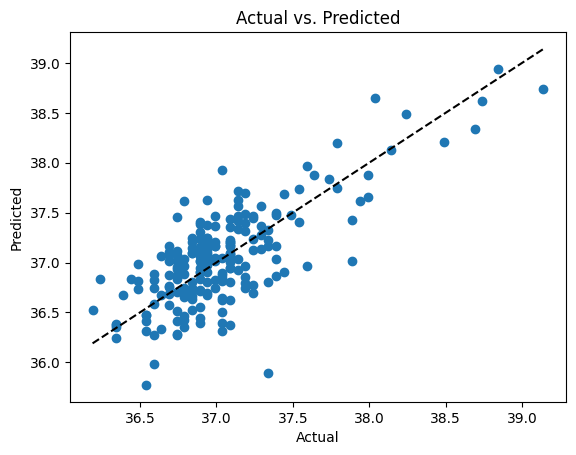

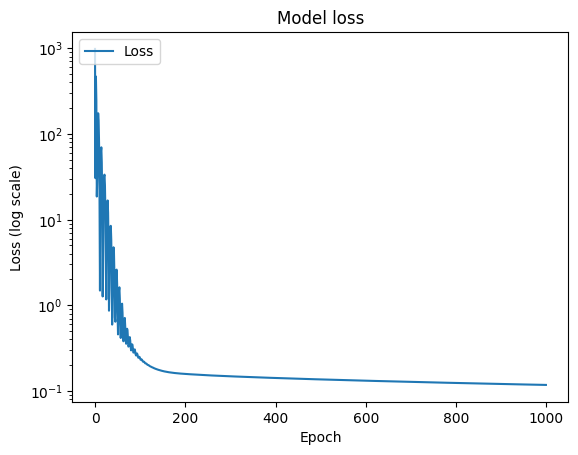

In [50]:
# Menampilkan plot hasil prediksi
visualize_results(y_test, y_pred.detach().numpy())

# Menampilkan plot hasil training
visualize_training(history)

# Menyimpan model
torch.save(model.state_dict(), 'model_pytorch_infrared.pth')

# B. Deep Learning dengan TensorFlow

## 1. Import Library yang Dibutuhkan

In [52]:
import tensorflow as tf
from tensorflow.keras.models import Sequential # untuk membuat model neural network
from tensorflow.keras.layers import Dense, Input, Flatten # untuk menambahkan layer pada model
from tensorflow.keras.optimizers import SGD # untuk mengoptimalkan model neural network

## 2. Penyusunan Model Neural Network


In [53]:
# Menentukan hyperparameter model
input_dim = X_train.shape[1] # Jumlah fitur
hidden_dim = 128 # Jumlah neuron pada hidden layer
output_dim = 1 # Jumlah neuron pada output layer

model_tf = Sequential([
    Dense(hidden_dim, activation='relu', input_shape=(input_dim,)) , # Layer input 128 neuron
    Dense(output_dim)  # Layer output 1 neuron
])



C:\Users\husai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## 3. Kompilasi Model

In [54]:
# Kompilasi model
model_tf.compile(optimizer='adam', loss='mse')

## 4. Pelatihan Model

In [55]:
# Melatih model
history = model_tf.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 498.8672   
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 25.0192 
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.0063 
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.1158 
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.3727 
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9850 
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6468 
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4944 
Epoch 9/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3872 
Epoch 10/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2662 
Epoch 11/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2381 
Epoch 12/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2114 
Epoch 13/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1917 
Epoch 14/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1795 
Epoch 15/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

## 6. Evaluasi model dengan menghitung MSE, RMSE, dan RSquared

In [56]:
# Memprediksi data uji
y_pred = model_tf.predict(X_test)

# Menghitung metrik evaluasi
mse, rmse, r2 = calculate_metrics(y_test, y_pred)
print(f'MSE: {mse}, RMSE: {rmse}, R^2: {r2}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
MSE: 0.13485222230656788, RMSE: 0.3672223063847945, R^2: 0.3220834561227244


## 7. Memvisualisasikan Prediksi dari model yang telah dilatih

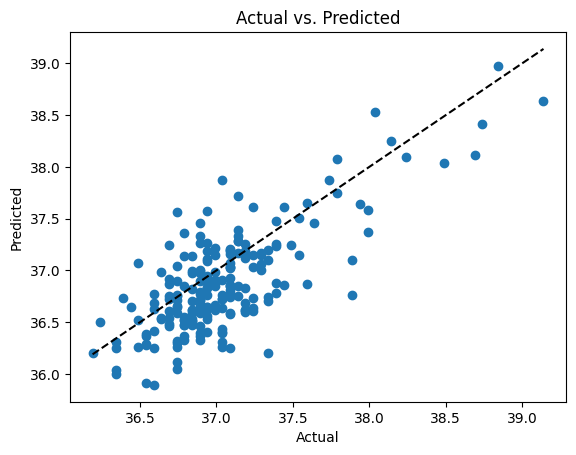

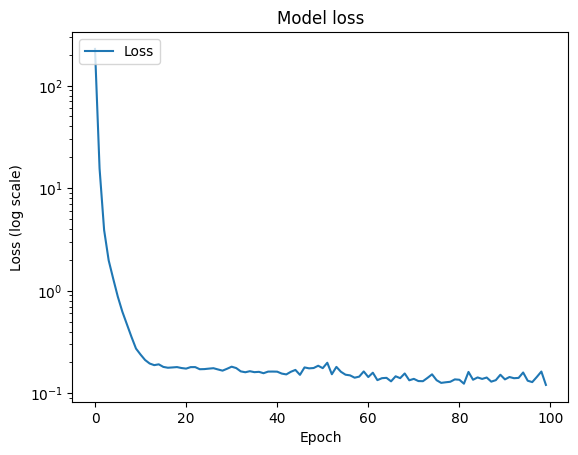

In [61]:
# Menampilkan plot hasil prediksi
visualize_results(y_test, y_pred)

# Menampilkan plot hasil training
visualize_training(history.history)

# Menyimpan model
model_tf.save('model_tensorflow_infrared.h5')

## Penjelasan Persamaan Matematika

### Mean Squared Error (MSE)
Mean Squared Error (MSE) adalah rata-rata dari kuadrat selisih antara nilai aktual dan nilai prediksi. MSE digunakan untuk mengukur seberapa baik model memprediksi nilai target. Rumusnya adalah:

\[ \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 \]

di mana:
- \( n \) adalah jumlah data
- \( y_i \) adalah nilai aktual
- \( \hat{y}_i \) adalah nilai prediksi

### Root Mean Squared Error (RMSE)
Root Mean Squared Error (RMSE) adalah akar kuadrat dari MSE. RMSE memberikan ukuran kesalahan prediksi dalam satuan yang sama dengan nilai target. Rumusnya adalah:

\[ \text{RMSE} = \sqrt{\text{MSE}} \]

### R-squared (R²)
R-squared (R²) adalah proporsi variansi dalam variabel dependen yang dapat dijelaskan oleh variabel independen dalam model. R² memberikan indikasi seberapa baik model cocok dengan data. Rumusnya adalah:

\[ R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2} \]

di mana:
- \( y_i \) adalah nilai aktual
- \( \hat{y}_i \) adalah nilai prediksi
- \( \bar{y} \) adalah rata-rata nilai aktual

### Sum of Squared Residuals (SSR)
Sum of Squared Residuals (SSR) adalah jumlah dari kuadrat selisih antara nilai aktual dan nilai prediksi. SSR digunakan dalam perhitungan R². Rumusnya adalah:

\[ \text{SSR} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 \]

### Total Sum of Squares (SST)
Total Sum of Squares (SST) adalah jumlah dari kuadrat selisih antara nilai aktual dan rata-rata nilai aktual. SST digunakan dalam perhitungan R². Rumusnya adalah:

\[ \text{SST} = \sum_{i=1}^{n} (y_i - \bar{y})^2 \]